In [1]:
from google.colab import files
uploaded = files.upload()

Saving train-00000-of-00001-c08a401c53fe5312.parquet to train-00000-of-00001-c08a401c53fe5312.parquet


In [2]:
import pandas as pd
import io

train_df = pd.read_parquet('train-00000-of-00001-c08a401c53fe5312.parquet')

In [3]:
uploaded = files.upload()

Saving test-00000-of-00001-44110b9df98c5585.parquet to test-00000-of-00001-44110b9df98c5585.parquet


In [4]:
test_df = pd.read_parquet('test-00000-of-00001-44110b9df98c5585.parquet')

In [5]:
print(train_df.columns)
print(len(train_df['image']))
print(len(train_df['label']))


Index(['image', 'label'], dtype='object')
5120
5120


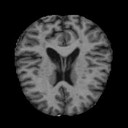

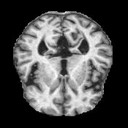

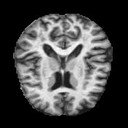

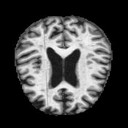

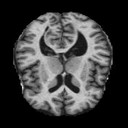

In [6]:
from PIL import Image
import io

for i in range(5):
  image_data = train_df['image'][i]
  image_bytes = image_data['bytes']
  image = Image.open(io.BytesIO(image_bytes))
  display(image)


In [7]:
X_train = train_df['image'].apply(lambda x: x['bytes'])
y_train = train_df['label']

X_test = test_df['image'].apply(lambda x: x['bytes'])
y_test = test_df['label']

In [8]:
import numpy as np
import io

def preprocess_image(image_bytes):
    try:
        image = Image.open(io.BytesIO(image_bytes)).convert("L") #convert to gray-scale
        image = image.resize((128, 128))
        image = np.array(image, dtype=np.float32) / 255.0
        return image
    except Exception as e:
        print("Errore nel caricamento di un'immagine:", e)
        return None


image_bytes_train = train_df['image'].apply(lambda x: x['bytes'])
image_bytes_test = test_df['image'].apply(lambda x: x['bytes'])



X_train = [preprocess_image(b) for b in image_bytes_train]
X_test = [preprocess_image(b) for b in image_bytes_test]


X_train = np.array([img for img in X_train if img is not None])
X_test = np.array([img for img in X_test if img is not None])


X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)



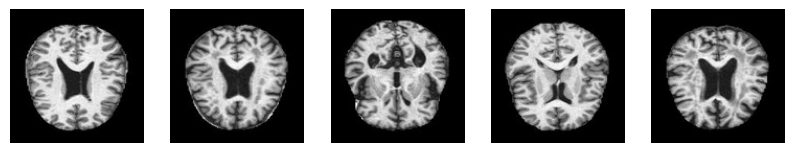

In [9]:
import matplotlib.pyplot as plt
import random


random_indices = random.sample(range(len(X_train)), 5)
random_images = X_train[random_indices]

plt.figure(figsize=(10, 5))
for i, image in enumerate(random_images):
  plt.subplot(1, 5, i + 1)
  plt.imshow(image, cmap="gray")
  plt.axis('off')
plt.show()



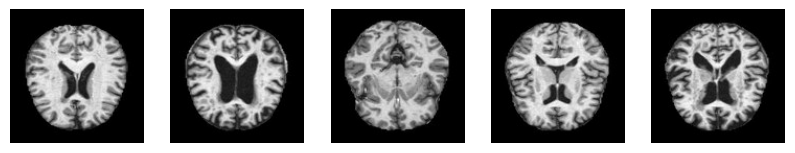

In [10]:
import matplotlib.pyplot as plt
import random


random_indices = random.sample(range(len(X_test)), 5)
random_images = X_train[random_indices]


plt.figure(figsize=(10, 5))
for i, image in enumerate(random_images):
  plt.subplot(1, 5, i + 1)
  plt.imshow(image, cmap="gray")
  plt.axis('off')
plt.show()



In [11]:
print("Forma di X_train:", X_train.shape)
print("Tipo di dati di X_train:", X_train.dtype)

print("Forma di X_test:", X_test.shape)
print("Tipo di dati di X_test:", X_test.dtype)

print(len(train_df['image']))
print(len(train_df['label']))


Forma di X_train: (5120, 128, 128, 1)
Tipo di dati di X_train: float32
Forma di X_test: (1280, 128, 128, 1)
Tipo di dati di X_test: float32
5120
5120


In [12]:


y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)


In [13]:
print(len(train_df['image']))
print(len(train_df['label']))


from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)

5120
5120


In [14]:
assert len(X_train) == len(y_train), f"Mismatch: X_train ha {len(X_train)}, y_train ha {len(y_train)}"
assert len(X_test) == len(y_test), f"Mismatch: X_test ha {len(X_test)}, y_test ha {len(y_test)}"
#per vedere se len(y_train)=len(x_train)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


#modello
model = keras.Sequential([
    keras.Input(shape=(128, 128, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])



model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,584,970 (17.49 MB)

 Trainable params: 4,584,970 (17.49 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(X_train)

#per evitare overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#addestramento
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=40,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


print("Final training accuracy:", history.history['accuracy'][-1])
print("Final validation accuracy:", history.history['val_accuracy'][-1])


Epoch 1/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.7426 - loss: 0.5675 - val_accuracy: 0.7797 - val_loss: 0.5558
Epoch 2/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.7673 - loss: 0.5090 - val_accuracy: 0.8023 - val_loss: 0.4880
Epoch 3/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.7778 - loss: 0.5115 - val_accuracy: 0.8094 - val_loss: 0.4581
Epoch 4/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.8014 - loss: 0.4655 - val_accuracy: 0.7742 - val_loss: 0.5385
Epoch 5/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7945 - loss: 0.4736 - val_accuracy: 0.8422 - val_loss: 0.3919
Epoch 6/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.8250 - loss: 0.4247 - val_accuracy: 0.8461 - val_loss: 0.3898
Epoch 7/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.8178 - loss: 0.4325 - val_accuracy: 0.8602 - val_loss: 0.3346
Epoch 8/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.8410 - loss: 0.3892 - va

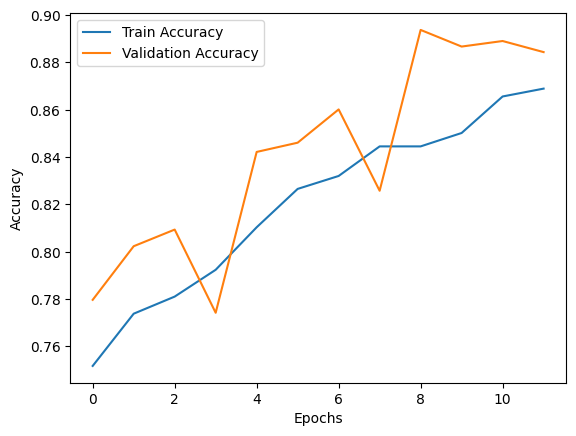

In [19]:
import matplotlib.pyplot as plt

# Traccia il grafico dell'accuratezza
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
